<a href="https://colab.research.google.com/github/VictorAlexandr/Data-Science-Projects/blob/main/Urban_Mobility_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto de Previsão de Tempo de Viagem**

***Introdução***
Este projeto tem como objetivo desenvolver um modelo de machine learning para prever o tempo de viagem de táxis em Nova York. O modelo será treinado com um conjunto de dados históricos de viagens de táxi e será avaliado com base em sua capacidade de prever o tempo de viagem de novas viagens.

***Objetivos***
- Desenvolver um modelo de machine learning para prever o tempo de viagem de táxis em Nova York

- Avaliar o desempenho do modelo com base em métricas de erro

- Identificar as variáveis mais importantes para a previsão do tempo de viagem

***Dataset Utilizado***

- **Nome do Dataset:** Yellow Taxi Trip Data

- **Fonte:** NYC Yellow Taxi Trip Data

- **Descrição:** O dataset contém informações sobre viagens de táxi em Nova York, incluindo a data e hora de início e fim da viagem, a localização de início e fim da viagem, o número de passageiros, a distância percorrida e o tempo de viagem.

***Características do Dataset***

- **Tamanho:** 309.664 linhas

- **Variáveis:** 14

- **Tipo de dados:** Numérico e categórico

***Tecnologias Utilizadas***

- **Linguagem de programação:** Python

- **Bibliotecas:** Pandas, NumPy, Scikit-learn, Matplotlib

- **Ambiente de desenvolvimento:** Jupyter Notebook / Colab

**Importando Bibliotecas**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

**Carregando o Dataset**

In [2]:
# Carregando o dataset
df = pd.read_csv('yellow_tripdata_2015-01.csv')

**Explorando os Dados**

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2015-01-15 19:05:39   2015-01-15 19:23:42              1.0   
1         1  2015-01-10 20:33:38   2015-01-10 20:53:28              1.0   
2         1  2015-01-10 20:33:38   2015-01-10 20:43:41              1.0   
3         1  2015-01-10 20:33:39   2015-01-10 20:35:31              1.0   
4         1  2015-01-10 20:33:39   2015-01-10 20:52:58              1.0   

   trip_distance  pickup_longitude  pickup_latitude  RateCodeID  \
0           1.59        -73.993896        40.750111         1.0   
1           3.30        -74.001648        40.724243         1.0   
2           1.80        -73.963341        40.802788         1.0   
3           0.50        -74.009087        40.713818         1.0   
4           3.00        -73.971176        40.762428         1.0   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -73.974785         40.750618           1.0

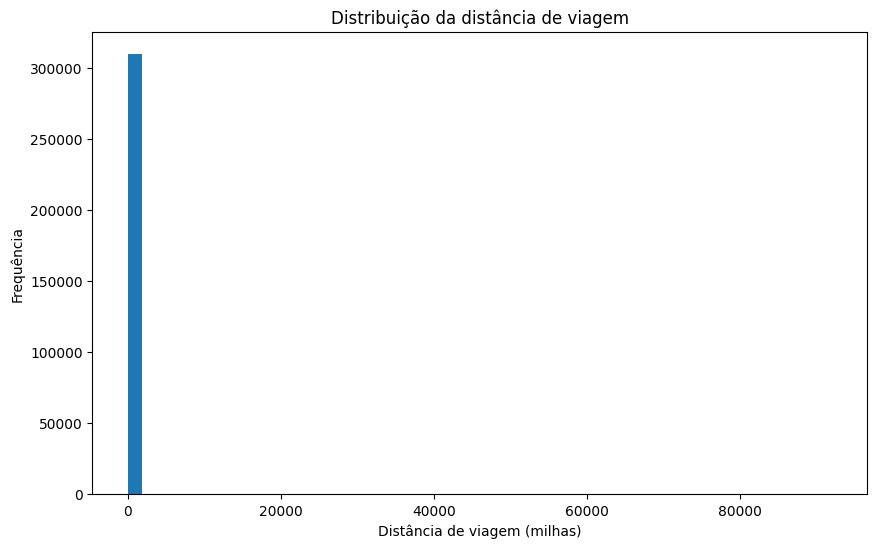

In [4]:
# Verificando as primeiras linhas do dataframe
print(df.head())

# Verificando as estatisticas descritivas do dataframe
print(df.describe())

# Visualizando a distribuição da distância de viagem

plt.figure(figsize=(10,6))
plt.hist(df['trip_distance'], bins=50)
plt.title('Distribuição da distância de viagem')
plt.xlabel('Distância de viagem (milhas)')
plt.ylabel('Frequência')
plt.show()


**Preparando os Dados**

In [8]:
# Convertendo as colunas de data para datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

In [9]:
# Removendo linhas com dados inválidos
df = df.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])


In [10]:
# Criando a coluna "hora" e "dia"
df['hora'] = df['tpep_pickup_datetime'].dt.hour
df['dia'] = df['tpep_pickup_datetime'].dt.dayofweek

In [11]:
# Criando a coluna "trip_duration"
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [12]:
# Selecionando as variáveis relevantes para o modelo
X = df[['hora', 'dia', 'passenger_count', 'trip_distance']]
y = df['trip_duration']

**Dividindo os Dados em Treinamento e Teste**

In [13]:
# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Treinando o Modelo**

In [15]:
# Treinando o modelo de regressão random forest
rf = RandomForestRegressor(n_estimators=100, random_state=40)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=40)

**Previsão do Tempo de Viagem**

In [16]:
# Previsão do tempo de viagem para os dados de teste
y_pred = rf.predict(X_test)

**Avaliação do Desempenho do Modelo**

In [17]:
# Avaliação do desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Erro Médio quadrádico: {mse:.2f} minutos')


Erro Médio quadrádico: 1393.30 minutos


**Visualização dos Resultados**

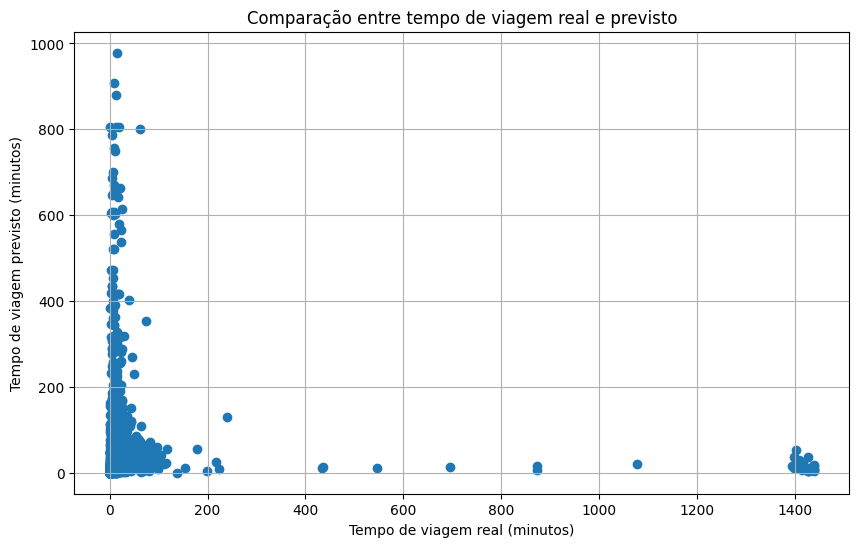

In [19]:
# Visualização dos Resultados
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Tempo de viagem real (minutos)')
plt.ylabel('Tempo de viagem previsto (minutos)')
plt.title('Comparação entre tempo de viagem real e previsto')
plt.grid(True)
plt.show()

***Para melhorar o desempenho do modelo, podemos:***

**Aumentar o número de estimadores:** Tente aumentar o número de estimadores no modelo de regressão random forest para ver se isso melhora a precisão.

**Selecionar variáveis mais relevantes:** Verifique se as variáveis que você está usando no modelo são as mais relevantes para prever o tempo de viagem. Talvez você possa adicionar ou remover variáveis para melhorar o desempenho.

**Usar técnicas de pré-processamento:** Verifique se há alguma técnica de pré-processamento que possa ser aplicada aos dados para melhorar a precisão do modelo.

**Experimentar com outros algoritmos:** Talvez você possa experimentar com outros algoritmos de regressão, como o Gradient Boosting ou o Support Vector Regression, para ver se eles têm um desempenho melhor.

- **Aumentar o número de estimadores**

Vamos aumentar o número de estimadores no modelo de regressão random forest para ver se isso melhora a precisão. Em vez de usar 100 estimadores, vamos usar 200.

In [ ]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

- **Selecionar variáveis mais relevantes**

Vamos verificar se as variáveis que estamos usando no modelo são as mais relevantes para prever o tempo de viagem. Em vez de usar apenas as variáveis "hora", "dia", "passenger_count" e "trip_distance", vamos adicionar a variável "pickup_longitude" e "pickup_latitude" ao modelo.

In [ ]:
X = df[['hora', 'dia', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude']]
y = df['trip_duration']

- **Usar técnicas de pré-processamento**

Vamos verificar se há alguma técnica de pré-processamento que possa ser aplicada aos dados para melhorar a precisão do modelo. Em vez de usar os dados brutos, vamos aplicar a técnica de normalização para os dados.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- **Experimentar com outros algoritmos**

Vamos experimentar com outros algoritmos de regressão para ver se eles têm um desempenho melhor. Em vez de usar o modelo de regressão random forest, vamos usar o modelo de regressão gradient boosting.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
gb.fit(X_train, y_train)

***Agora que fizemos essas mudanças, vamos treinar o modelo novamente e avaliar seu desempenho.***

In [ ]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Erro médio quadrático: {mse:.2f} minutos')